<a href="https://colab.research.google.com/github/lucianomcsilva/RIWRS/blob/main/%5BRIWRS%5D_5_Identifica%C3%A7%C3%A3o_de_padr%C3%B5es_de_autores_em_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#packages
!pip install unidecode
!pip install fraction

# Load EDA Pkgs
import pandas as pd
import numpy as np
import random

# Load ML Pkgs
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('rslp')

#charts & others stuff
from unidecode import unidecode
import matplotlib.pyplot as plt
import re
import string
from fractions import Fraction



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [27]:
#Monta-se os dados que queremos verificar em um DataFrame Pandas
texto_verificar = np.array([
                            ("Desconhecido", "Publicação de Arnaldo Jabor", "Bolsonaro é um tipo de cara sem etiqueta, daqueles que encontramos coçando o saco no barzinho jogando bilhar. Apesar de ter mais estudo do que qualquer professor de humanas da geração Paulo Freire e mais inteligência emocional do que qualquer outro político brasileiro, não há polidez em suas palavras e tão pouco elegância em seu comportamento. Isso é o que mais incomoda artistas, jornalistas, feministas mal amadas e complexadas, homens frágeis, covardes oportunistas, religiosos falidos na luta contra a própria imoralidade, maconheiros, pedófilos, estupradores e toda patrulha do politicamente correto que suportou calada um circo de corrupção durante duas décadas, mas que agora é ferida com as palavras do presidente “não pudico”. Bolsonaro é o milico com piadinhas sem graça, é o tiozão que pergunta se já temos pentelho, é um elefante em uma loja de cristais, mas o que me faz a cada dia gostar mais desse cara, é o tipo de gente que não gosta dele, que se ofende com tudo que o cara faz, que do óleo venezuelano em nossas praias à histeria mundial perante o coronavírus, buscam um meio de responsabilizá-lo. Bolsonaro realmente é o cara que você passa gostar, quando vê o lixo de gente que não gosta dele."),
                            ("Desconhecido", "Crônica inteligente de Arnaldo Jabor", "Brasileiro… Brasileiro é um povo solidário. Mentira. Brasileiro é babaca. Eleger para o cargo mais importante do Estado um sujeito que não tem escolaridade e preparo nem para ser gari, só porque tem uma história de vida sofrida; Pagar 40% de sua renda em tributos e ainda dar esmola para pobre na rua ao invés de cobrar do governo uma solução para pobreza;\nAceitar que ONG’s de direitos humanos fiquem dando pitaco na forma como tratamos nossa criminalidade… Não protestar cada vez que o governo compra colchões para presidiários que queimaram os deles de propósito, não é coisa de gente solidária. É coisa de gente otária.\nBrasileiro é um povo alegre. Mentira. Brasileiro é bobalhão. Fazer piadinha com as imundices que acompanhamos todo dia é o mesmo que tomar bofetada na cara e dar risada. Depois de um massacre que durou quatro dias em São Paulo, ouvir o José Simão fazer piadinha a respeito e achar graça, é o mesmo que contar piada no enterro do pai. Brasileiro tem um sério problema. Quando surge um escândalo, ao invés de protestar e tomar providências como cidadão, ri feito bobo."),
                            ("Arnaldo Jabor CBN", "Muita gente quer votar em Bolsonaro para se vingar", "Amigos ouvintes, vocês assistiram aos debates dos jornalistas com os candidatos Jair Bolsonaro e Marina Silva. Não, pois perderam a chance de ver o absurdo que se avizinha no horizonte com nossos possíveis eleitos para presidência. É incrível. Primeiro Bolsonaro no programa Roda Viva foi um show de absurdos. Uma janelinha aberta para vermos a incompetência do homem. Creio também que os jornalistas, que são todos ótimos aliás, perderam a chance de fazer perguntas que decifrassem o enigma de sua utopia de caserna. O tempo todo ele se defendeu com a velha técnica dos reacionários sem razão que falam bem rápido, confusamente, de propósito para deixar a impressão de que algo foi respondido quando nada aconteceu. A maioria das perguntas tinha por fito provar que o Bolsonaro é um despreparado, careta, preconceituoso, racista, etc. E perguntaram sobre aborto, mundo gay, estupro, relação com mulheres. Mas poderiam ter perguntado sobre o que planos ele teria pelo seu eventual governo. O povo que poderá votar nele está preocupado se ele gosta de gay ou não. Se aborto pode ou não pode. Ora francamente o povão bolsonarista quer denúncias violentas, ameaças machistas contra o crime que era uma espécie de trumpzinho de gericinó, dizendo que vai botar pra quebrar. E o maior perigo é que muita gente ignorante vai votar nele para se vingar do Brasil. Isso! Esse Brasil está em crise e o que muitos querem quebrar. De raiva. Isso é muito perigoso. \nEu vi também a entrevista que a Marina Silva deu para outro grupo de jornalistas no dia seguinte. Meu Deus! Que coisa mais frágil! Que coisa mais pobre de ideias. Que coisa triste ver aquela boa mulher de ótimo caráter sem dúvida, mas sentadinha ali com sua vozinha falando em ética e ideias gerais sobre o país e visivelmente tentando encontrar um caminho entre um liberalismo maior e pequenas reverências aos petistas perdidos. Uma senhora sem força para ser presidente e um neonazista sem rumo. Não há um só programinha para o país dessa gente. Realmente é de gelar o sangue. O Brasil com candidatos risíveis, de chanchada, sem contar com os outros que vem aí como perigosíssimo Ciro Gomes. É triste pois como dizia um amigo meu o Brasil não tem pessoal.")
])
df_ver = pd.DataFrame(data=texto_verificar, columns=["author", 'title', "content"])
df_ver.head()

,author,title,content
0,Desconhecido,Publicação de Arnaldo Jabor,"Bolsonaro é um tipo de cara sem etiqueta, daqu..."
1,Desconhecido,Crônica inteligente de Arnaldo Jabor,Brasileiro… Brasileiro é um povo solidário. Me...
2,Arnaldo Jabor CBN,Muita gente quer votar em Bolsonaro para se vi...,"Amigos ouvintes, vocês assistiram aos debates ..."


## Carregando artigos

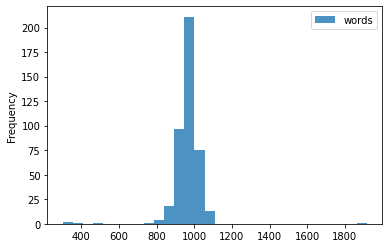

In [28]:
#Carrega o texto em um DataFrame PAndas
df_aj = pd.read_json("https://raw.githubusercontent.com/lucianomcsilva/robo_aj/master/arnaldo_jabor.json")
# df_aj = pd.read_json("UolBlogs.json")
# df_aj = df_aj.loc[df_aj['author'] == 'Juca Kfouri' ]
# df_aj = pd.read_json('https://raw.githubusercontent.com/lucianomcsilva/articulistas/main/UolBlogs.json')
# df_aj = df_aj.loc[df_aj['author'] == 'Josias de Souza' ]

#Faz a contagem de palavras por cada linha do artigo
df_aj['words'] = df_aj['content'].str.split().str.len()

#Elimina qualquer artigo que tenha gerado menos de 100 palavras
df_aj = df_aj.loc[(df_aj['words'] > 100)]

#Plota o DataFrame em histograma para uma avaliação
df_aj.plot.hist(bins=30, alpha=0.8)



## mesmo tratmento da trilha anterior de limpeza do texto

### Limpeza

In [29]:
stop = stopwords.words('portuguese')
# stop.append('nao')
stop2 = list()
for word in stop:
  stop2.append(unidecode(word))
  
stemmer = nltk.stem.RSLPStemmer()

In [30]:
# remoção de palavras de parada
df_aj['content_treated'] = df_aj['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_ver['content_treated'] = df_ver['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


#FAzendo Steammer
# df['content_treated'] = df['content'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# df_aj['content_treated'] = df_aj['content'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# df_ver['content_treated'] = df_ver['content'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

#Transforma em minuscula e remoção de acentos 
df_aj['content_treated'] = df_aj['content_treated'].str.lower().apply(lambda x: unidecode(x))
df_ver['content_treated'] = df_ver['content_treated'].str.lower().apply(lambda x: unidecode(x))

# remocação de pontuaçao
df_aj['content_treated'] = df_aj['content_treated'].str.replace('[{}]'.format(string.punctuation), ' ')
df_ver['content_treated'] = df_ver['content_treated'].str.replace('[{}]'.format(string.punctuation), ' ')

# remocação de numeros
df_aj['content_treated'] = df_aj['content_treated'].str.replace('[{}]'.format(string.digits), '')
df_ver['content_treated'] = df_ver['content_treated'].str.replace('[{}]'.format(string.digits), '')

# remoção de palavras de parada (repescagem)
# df_aj['content_treated'] = df_aj['content_treated'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))
# df_ver['content_treated'] = df_ver['content_treated'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa270d12e10>,
      dtype=object)

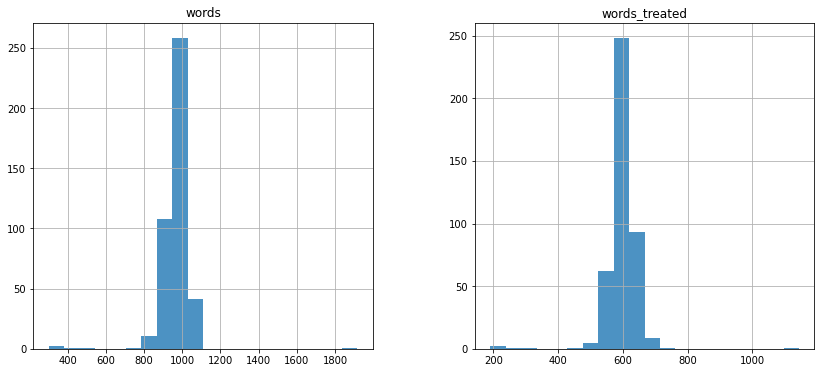

In [31]:
#Plota o DataFrame em histograma para uma avaliação
#Faz a contagem de palavras por cada linha do artigo
df_aj['words_treated'] = df_aj['content_treated'].str.split().str.len()
#df_aj.plot();
df_aj.hist(bins=20, alpha=0.8, figsize=(14,6))
#df_aj.sample(10)

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
vectorizer = CountVectorizer()

#Arnaldo Jabor
XAJ = vectorizer.fit_transform(df_aj['content_treated'])

vocabulary_aj = vectorizer.get_feature_names_out()

pdXAJ = pd.DataFrame(data=XAJ.toarray(), columns=vocabulary_aj) #.iloc[:,0::2]
display(pdXAJ)
#Arnaldo Jabor - Verificar
XVER = vectorizer.fit_transform(df_ver['content_treated'])
vocabulary_ver = vectorizer.get_feature_names_out()
pdXVER = pd.DataFrame(data=XVER.toarray(), columns=vocabulary_ver) #.iloc[:,0::2]

,aaah,aaahhh,aah,aas,ab,abacaxi,abacaxis,abafados,abafar,abafavam,...,zum,zumba,zumbi,zumbis,zuniam,zurram,zurro,zuzu,zygmunt,zylberstajn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
print(vocabulary_aj)

['aaah', 'aaahhh', 'aah', 'aas', 'ab', 'abacaxi', 'abacaxis', 'abafados', 'abafar', 'abafavam', 'abaixar', 'abaixo', 'abajur', 'abajures', 'abalada', 'abalado', 'abanando', 'abandona', 'abandonada', 'abandonadas', 'abandonado', 'abandonados', 'abandonam', 'abandonando', 'abandonar', 'abandonarei', 'abandone', 'abandono', 'abandonou', 'abarrotados', 'abastecer', 'abate', 'abatedouro', 'abateu', 'abatia', 'abatida', 'abatido', 'abbie', 'abc', 'abelha', 'abelhas', 'abencoa', 'abencoada', 'abencoado', 'abencoar', 'abencoe', 'aberta', 'abertamente', 'abertas', 'aberto', 'abertos', 'abertura', 'abestalhado', 'abigail', 'abismo', 'abismos', 'abobalhada', 'abobalhados', 'abobora', 'aboboras', 'abole', 'abolicao', 'abolida', 'abolido', 'abolidos', 'abolir', 'aboliria', 'aboliu', 'abominacoes', 'abomino', 'abordado', 'abordam', 'abordando', 'abordar', 'abordou', 'aborrecida', 'abortadas', 'abortar', 'aborteira', 'aborto', 'abra', 'abraca', 'abracada', 'abracado', 'abracando', 'abracar', 'abracei

In [50]:
len(vocabulary_aj)
df_XAJ = pdXAJ.T
df_XAJ['total_aj'] = df_XAJ.sum(axis=1) 
#pdXAJ[['tudo', 'ser', 'hoje', 'grande', 'brasileiro', 'mundo', 'vida', 'morte', 'morrer', 'otario', 'ahh', 'anos', 'nada', 'futuro']]
df_XAJ



,0,1,2,3,4,5,6,7,8,9,...,415,416,417,418,419,420,421,422,423,total_aj
aaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
aaahhh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
aas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zurram,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
zurro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
zuzu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
zygmunt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
# Arnaldo Jabor
# Transpoe a matriz para que as palavras fiquem como linhas, e cada documento como uma linha
df_XAJ = pdXAJ.T



#Calcula a quantidade de vezes que cada palavra é utilizada
df_XAJ['total_aj'] = df_XAJ.sum(axis=1) 

#Remove as colunas individuais de cada documento para gerar a tabela
df_XAJ.drop(df_XAJ.columns[0:len(df_aj['content'])], axis=1, inplace=True)

#Ordena o resultado final
df_XAJ = df_XAJ.sort_values(by='total_aj', ascending=False)

#Gera a tabela
df_XAJ.head(30)

,total_aj
nao,1286
tudo,1141
mundo,1022
hoje,972
eu,936
vida,806
pais,790
que,758
mas,736
anos,735


,0,1,2,3,4,5,6,7,8,9,...,416,417,418,419,420,421,422,423,present,not_present
aaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.004717,0.992925
aaahhh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,1.000000
aah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.000000,1.000000
aas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.002358,0.995283
ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.004717,0.992925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zurram,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.011792,0.985849
zurro,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.000000,1.000000
zuzu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,1.000000
zygmunt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,1.000000


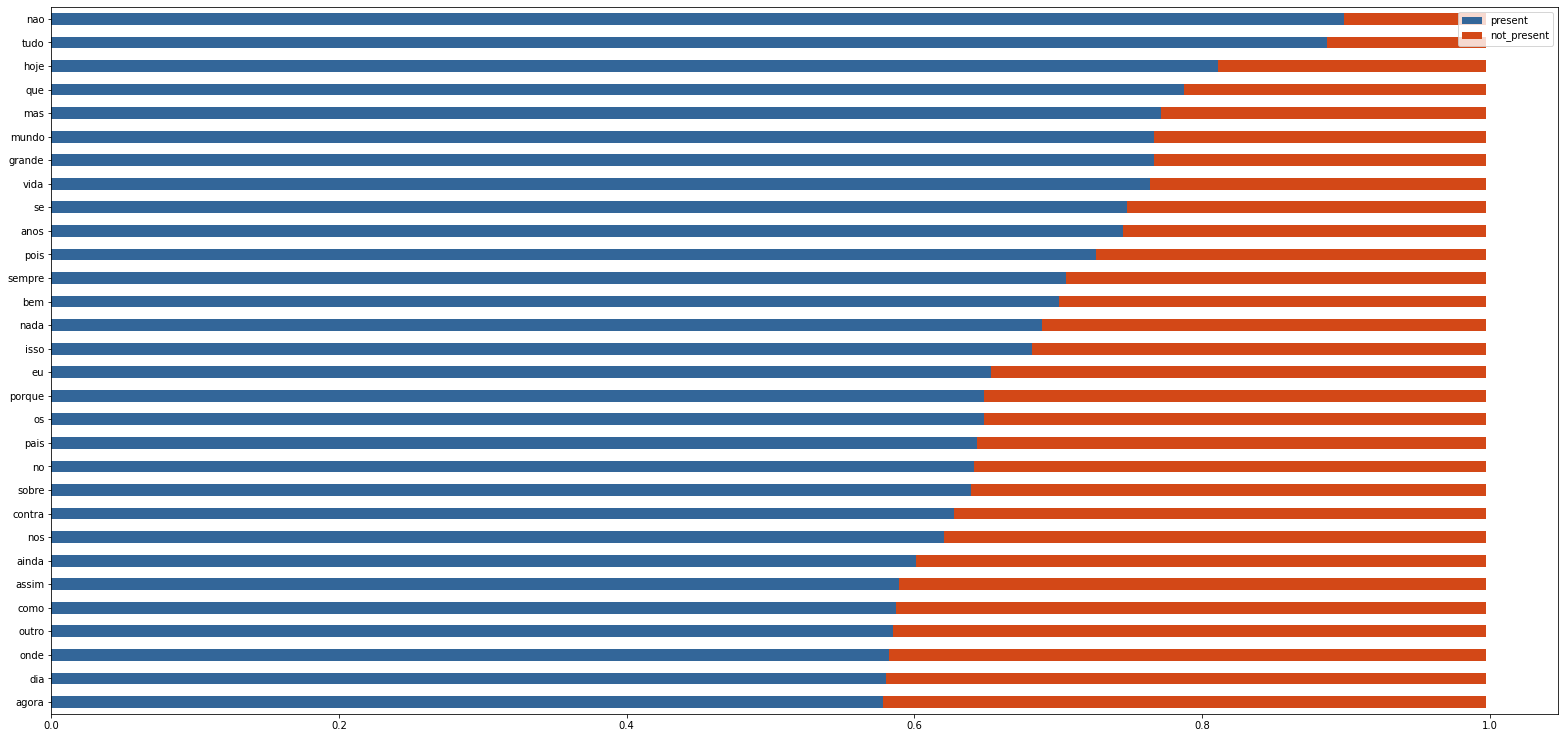

In [53]:
# Arnaldo Jabor
# Transpoe a matriz para que as palavras fiquem como linhas, e cada documento como uma linha
pdXAJT = pdXAJ.T
#pdXAJT = pdXAJ[['tudo', 'ser', 'hoje', 'grande', 'brasileiro', 'mundo', 'vida', 'morte', 'morrer', 'otario', 'ahh', 'anos', 'nada', 'futuro']].T
#pdXAJT = pdXAJ[['tudo',  'hoje', 'grande', 'brasileiro', 'mundo', 'vida', 'morte', 'morrer', 'otario', 'ahh', 'anos', 'nada', 'futuro']].T

#Calcula a quantidade de documetnos que aquela palavra entrou ou nao entrou
pdXAJT['present'] = (pdXAJT.ne(0).sum(axis=1) -1) / len(df_aj['content'])
pdXAJT['not_present'] = pdXAJT.eq(0).sum(axis=1) / len(df_aj['content'])
display(pdXAJT)
#REmove as colunas individuais de cada documento para gerar o grafico
pdXAJT.drop(pdXAJT.columns[0:len(df_aj['content'])], axis=1, inplace=True)

#Ordena o resultado final
pdXAJT = pdXAJT.sort_values(by='present', ascending=True)

#Gera o gráfico contendo as 30 palavras mais usadas
pdXAJT.tail(30).plot.barh(stacked=True, color=['#336699', '#D34817'], figsize=(27,13))

In [25]:
n_words = 30
pdXAJT.tail(n_words)

,present,not_present
otario,0.002358,0.995283
ahh,0.028302,0.969340
ser,0.106132,0.891509
morrer,0.115566,0.882075
brasileiro,0.233491,0.764151
morte,0.422170,0.575472
futuro,0.462264,0.535377
nada,0.688679,0.308962
anos,0.745283,0.252358
vida,0.764151,0.233491


,nao,tudo,hoje,que,mas,grande,mundo,vida,se,anos,...,contra,nos,ainda,assim,como,outro,onde,dia,agora,present
0,4,2,4,0,5,0,1,0,5,2,...,4,6,3,0,2,0,2,0,3,0.666667
1,4,4,3,2,2,1,0,2,1,5,...,1,0,4,1,0,1,6,3,0,0.800000
2,0,2,6,1,0,2,10,2,5,0,...,3,1,0,1,5,1,2,0,2,0.766667
3,2,1,2,5,1,2,1,4,0,6,...,0,0,1,4,2,2,2,4,1,0.800000
4,1,2,3,1,3,2,7,1,1,1,...,2,1,0,0,2,2,1,0,1,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,5,3,4,0,2,2,10,4,6,3,...,1,0,1,2,0,0,0,0,2,0.700000
420,7,4,0,0,3,4,1,4,8,0,...,3,2,0,2,0,1,1,0,3,0.700000
421,3,0,1,0,1,1,5,0,0,0,...,4,1,1,1,1,0,0,2,0,0.700000
422,4,4,2,4,0,0,0,1,0,5,...,0,1,1,3,4,1,3,3,0,0.700000


,present
0,0.666667
1,0.800000
2,0.766667
3,0.800000
4,0.833333
...,...
419,0.700000
420,0.700000
421,0.700000
422,0.700000


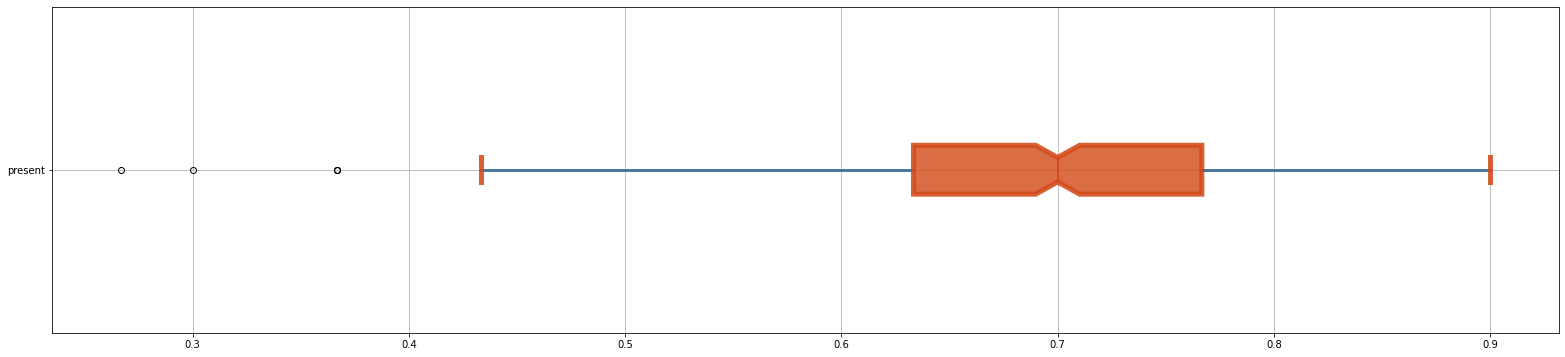

In [54]:
#Reinicia a matriz transposta
pdXAJT = pdXAJ.T

#Recalcula tudo (para evitar problemas como ordem de exceução das celulas)
pdXAJT['present'] = (pdXAJT.ne(0).sum(axis=1) -1) / len(df_aj['content_treated'])
pdXAJT = pdXAJT.sort_values(by='present', ascending=False)
pdXAJT.drop('present', axis=1, inplace=True)

#Cria uma lista com as 30 palavras mais utilizadas
most_commons = list(pdXAJT.head(n_words).index.array)

#Filtra as 30 palavras e Traspoe novamente
pdXAJT = pdXAJT.filter(items=most_commons, axis=0).T

# Cria novas colunas com o percentual das 30 palavras mais utilizadas
# presentes em cada corpus
pdXAJT['present'] = (pdXAJT.ne(0).sum(axis=1)) / n_words
display(pdXAJT)

#Remove as colunas individuais de cada palavra para gerar o grafico
pdXAJT.drop(pdXAJT.columns[0:n_words], axis=1, inplace=True)
display(pdXAJT)
#Gera o gráfico de boxplor 
pdXAJT.boxplot(vert=False, figsize=(27,6), notch=True, patch_artist=True,  # fill with color               
               boxprops=dict(linestyle='-', linewidth=5, color='#D34817DD', facecolor='#D34817CC'),
               medianprops=dict(linestyle='-', linewidth=2,  color='#D34817DD'),
               whiskerprops=dict(linestyle='-', linewidth=3, color='#336699DD'),
               capprops=dict(linestyle='-', linewidth=5,  color='#D34817DD')               
)


In [55]:
# Arnaldo Jabor
#Reinicia a matriz
pdXAJT = pdXAJ.T

#Mantem o percentual de frequencia de uso para comparação
pdXAJT['present'] = (pdXAJT.ne(0).sum(axis=1) -1) / len(df_aj['content_treated'])

#Ordena
pdXAJT = pdXAJT.sort_values(by='present', ascending=False)

#Mantem so as 30 primeiras palavras
pdXAJT = pdXAJT.head(n_words)

#mantem 15 textos aleatorios para comparar com os demais exemplos
#sample_drop =  random.sample(range(0, len(df_aj['content'])), len(df_aj['content']) -0)
#pdXAJT.drop(columns=sample_drop, axis=1, inplace=True)
#pdXAJT.drop(columns='present', axis=1, inplace=True)

# Apaga todas as clunas, pois so queremos manter o indice para avaliar os demais textos
pdXAJT.drop(pdXAJT.columns[0:424], axis=1, inplace=True)


# Cria-se o Saco de Paalvara para os 3 textos que se deseja avaliar
# a autenticidade de Arnaldo Jabor. 
pdXVERT = pdXVER.T.rename(columns={0: "Texto 1", 1: "Texto 2", 2:"CBN"})

In [56]:
pd_comp = pd.merge(left=pdXAJT, right=pdXVERT, how='left', left_index=True, right_index=True)
   
pd_comp.replace(np.nan, 0, inplace=True)
pd_compT = pd_comp.T

pd_compT['most_commons'] = (pd_compT.ne(0).sum(axis=1)) / n_words
#pd_compT.drop(pd_compT.columns[0:30], axis=1, inplace=True)
pd_compT.T.round(2)

,present,Texto 1,Texto 2,CBN
nao,0.90,1.00,1.00,3.0
tudo,0.89,1.00,0.00,0.0
hoje,0.81,0.00,0.00,0.0
que,0.79,0.00,0.00,3.0
mas,0.77,0.00,0.00,1.0
grande,0.77,0.00,0.00,0.0
mundo,0.77,0.00,0.00,1.0
vida,0.76,0.00,1.00,0.0
se,0.75,0.00,0.00,1.0
anos,0.75,0.00,0.00,0.0
